**Problem:1**

Linear Regression

The comp-activ databases is a collection of a computer systems activity measures . 
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

DATA DICTIONARY:
-----------------------
System measures used:

lread - Reads (transfers per second ) between system memory and user memory
lwrite - writes (transfers per second) between system memory and user memory
scall - Number of system calls of all types per second
sread - Number of system read calls per second .
swrite - Number of system write calls per second .
fork - Number of system fork calls per second.
exec - Number of system exec calls per second.
rchar - Number of characters transferred per second by system read calls
wchar - Number of characters transfreed per second by system write calls
pgout - Number of page out requests per second
ppgout - Number of pages, paged out per second
pgfree - Number of pages per second placed on the free list.
pgscan - Number of pages checked if they can be freed per second
atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
pgin - Number of page-in requests per second
ppgin - Number of pages paged in per second
pflt - Number of page faults caused by protection errors (copy-on-writes).
vflt - Number of page faults caused by address translation .
runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
freemem - Number of memory pages available to user processes
freeswap - Number of disk blocks available for page swapping.
------------------------
usr - Portion of time (%) that cpus run in user mode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_excel("Compactiv.xlsx")

In [3]:
df

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40      CPU_Bound   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83  Not_CPU_Bound   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20  Not_CPU_Bound   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80  Not_CPU_Bound   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60  Not_CPU_Bound   
...     ...  ...     ...   ...    ...    ...     ...     ...            ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
0        4670  1730946   95  
1        7278  1869002   97  
2         702  1021237   87  
3        7248  1863704   98  
4         633  1760253   90  
...       ...      ...  ...  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[8192 rows x 22 columns]

EDA
Descriptive Analysis

In [4]:
df.head(10)

lread  lwrite  scall  sread  swrite  fork  exec    rchar     wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0   53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0    8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN   31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN    8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN   12185.0    0.0   
5      0       0   1201     65      61   0.4   0.4      NaN   58703.0    0.0   
6      1       0   5744    168     190   0.2   0.2      NaN  189975.0    6.0   
7     21      18   2799    291     211   0.6   0.4      NaN  259868.0    2.6   
8      0       0    264     42      33   0.2   0.2      NaN   10116.0    0.0   
9      0       0    188     13      24   0.2   0.2      NaN    6777.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   
5  ...     0.0   0.0   0.0    0.0   28.40   34.40  Not_CPU_Bound     6854   
6  ...     0.0   4.4   0.6    0.6   27.40   28.60  Not_CPU_Bound      312   
7  ...     0.0   0.0   1.0    1.0   35.40   71.00      CPU_Bound       87   
8  ...     0.0   0.0   0.4    0.8   15.63   18.44  Not_CPU_Bound     1374   
9  ...     0.0   0.0   0.0    0.0   15.60   16.80  Not_CPU_Bound     5310   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  
5  1877461   96  
6  1013458   89  
7       13    0  
8  1749756   98  
9  1859912   98  

[10 rows x 22 columns]

In [5]:
df.tail(10)

lread  lwrite  scall  sread  swrite   fork   exec     rchar     wchar  \
8182     10       0   5975    692     612   2.20   2.00  505718.0  475455.0   
8183      4       3   1509    501     139   0.60   1.00  312242.0  255308.0   
8184      8       2   4784    416     240   1.20   1.60  442876.0  110453.0   
8185     13       0   4279    235     176  12.22  34.47  289309.0   30701.0   
8186      0       0    300     56      46   0.20   0.20    1995.0   18052.0   
8187     16      12   3009    360     244   1.60   5.81  405250.0   85282.0   
8188      4       0   1596    170     146   2.40   1.80   89489.0   41764.0   
8189     16       5   3116    289     190   0.60   0.60  325948.0   52640.0   
8190     32      45   5180    254     179   1.20   1.20   62571.0   29505.0   
8191      2       0    985     55      46   1.60   4.80  111111.0   22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8182   5.99  ...  122.55  0.40  24.15  72.85   95.21  230.54  Not_CPU_Bound   
8183   0.00  ...    0.00  0.00   3.20   3.20   52.60  119.60      CPU_Bound   
8184   7.82  ...  129.06  0.40  35.27  48.70  106.81  329.86      CPU_Bound   
8185   0.40  ...    7.01  8.82   4.21   4.21  397.60  751.30  Not_CPU_Bound   
8186   0.80  ...    0.00  0.00   0.00   0.00   21.00   18.00  Not_CPU_Bound   
8187   8.02  ...   55.11  0.60  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20  0.80   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00  0.40  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04  0.40  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00  0.20   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8182      126  1039337   77  
8183     1051  1600333   92  
8184      205  1011407   77  
8185      184  1079269   61  
8186      272  1754832   97  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[10 rows x 22 columns]

In [6]:
df.shape

(8192, 22)

In [7]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [9]:
df.duplicated().sum()

0

In [10]:
df.runqsz.unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

In [11]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
df_num=df.select_dtypes(['float64', 'int64'])
df_cat=df.select_dtypes(['object'])                                     

In [14]:
imputer= SimpleImputer(missing_values=np.nan, strategy= 'median')

In [15]:
#As the data is skewed, it is good to consider using the median value for replacing the missing values.

In [16]:
df_num=pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [17]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   float64
 19  freeswap  8192 non-null   float64
 20  usr       8192 non-null   floa

In [18]:
df_num.describe().T

count          mean            std     min         25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.00        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.00        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.00     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.00      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.00      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.40        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.20        1.2   
rchar     8192.0  1.964728e+05  238446.012054   278.0    34860.50   125473.5   
wchar     8192.0  9.581275e+04  140728.464118  1498.0    22977.75    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.00        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.00        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.00        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.00        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.00        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.60        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.60        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.00       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.40      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.00      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.50  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.00       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      265394.750  2526649.00  
wchar      106037.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

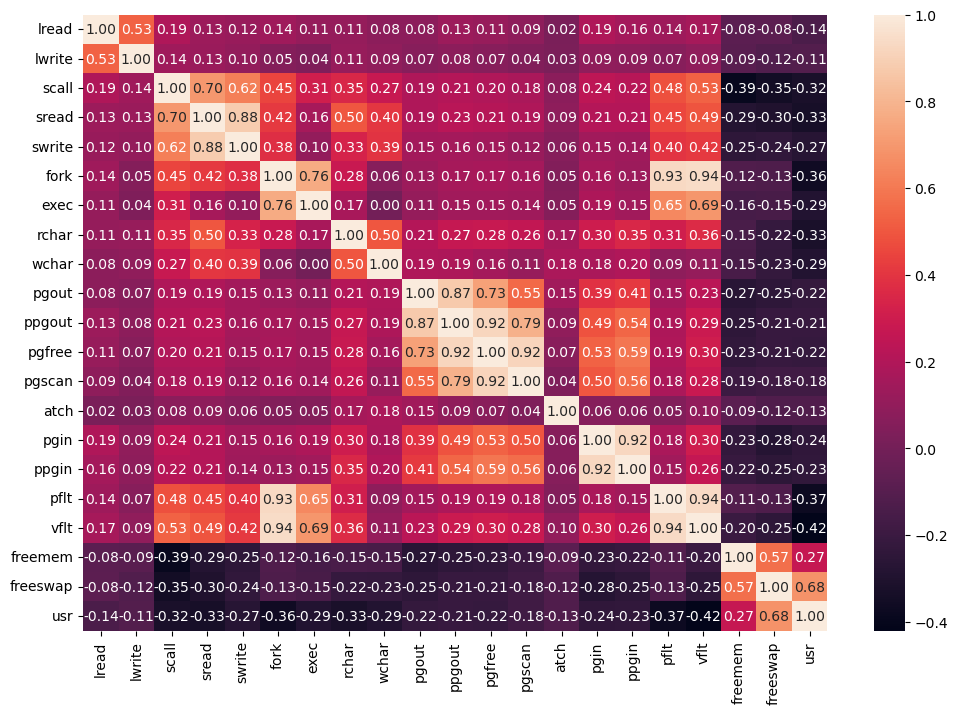

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f');

Data Visualization

Univariate Analysis

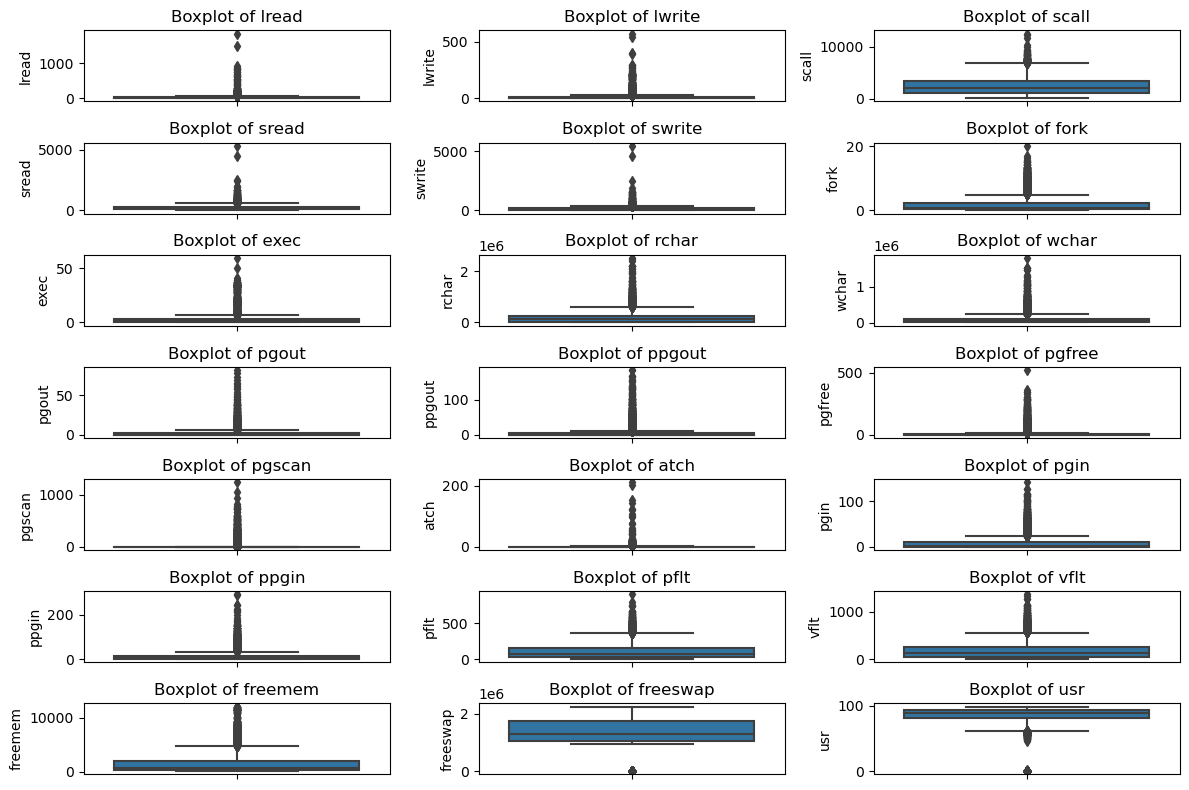

In [20]:
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: xlabel='runqsz', ylabel='count'>

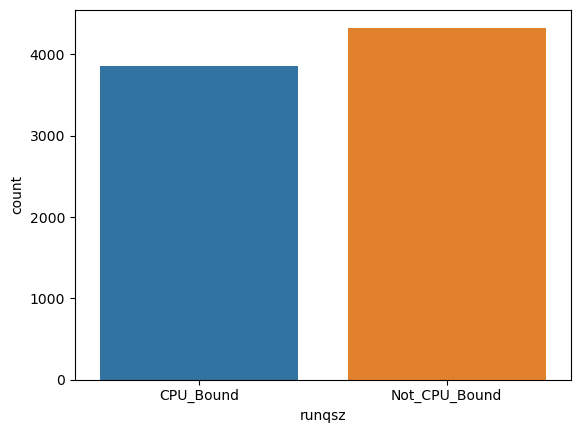

In [21]:
sns.countplot(data=df_cat,x='runqsz')

In [22]:
df_new= pd.concat([df_num, df_cat],axis=1,join='inner')

In [23]:
df_new

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  \
0       1.0     0.0  2147.0   79.0    68.0   0.2  0.20   40671.0  53995.0   
1       0.0     0.0   170.0   18.0    21.0   0.2  0.20     448.0   8385.0   
2      15.0     3.0  2162.0  159.0   119.0   2.0  2.40  125473.5  31950.0   
3       0.0     0.0   160.0   12.0    16.0   0.2  0.20  125473.5   8670.0   
4       5.0     1.0   330.0   39.0    38.0   0.4  0.40  125473.5  12185.0   
...     ...     ...     ...    ...     ...   ...   ...       ...      ...   
8187   16.0    12.0  3009.0  360.0   244.0   1.6  5.81  405250.0  85282.0   
8188    4.0     0.0  1596.0  170.0   146.0   2.4  1.80   89489.0  41764.0   
8189   16.0     5.0  3116.0  289.0   190.0   0.6  0.60  325948.0  52640.0   
8190   32.0    45.0  5180.0  254.0   179.0   1.2  1.20   62571.0  29505.0   
8191    2.0     0.0   985.0   55.0    46.0   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt  freemem  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40   4670.0   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83   7278.0   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20    702.0   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80   7248.0   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60    633.0   
...     ...  ...     ...   ...    ...    ...     ...     ...      ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74    387.0   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60    263.0   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80    400.0   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81    141.0   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00    659.0   

       freeswap   usr         runqsz  
0     1730946.0  95.0      CPU_Bound  
1     1869002.0  97.0  Not_CPU_Bound  
2     1021237.0  87.0  Not_CPU_Bound  
3     1863704.0  98.0  Not_CPU_Bound  
4     1760253.0  90.0  Not_CPU_Bound  
...         ...   ...            ...  
8187   986647.0  80.0      CPU_Bound  
8188  1055742.0  90.0  Not_CPU_Bound  
8189   969106.0  87.0  Not_CPU_Bound  
8190  1022458.0  83.0      CPU_Bound  
8191  1756514.0  94.0      CPU_Bound  

[8192 rows x 22 columns]

Bivariate Analysis

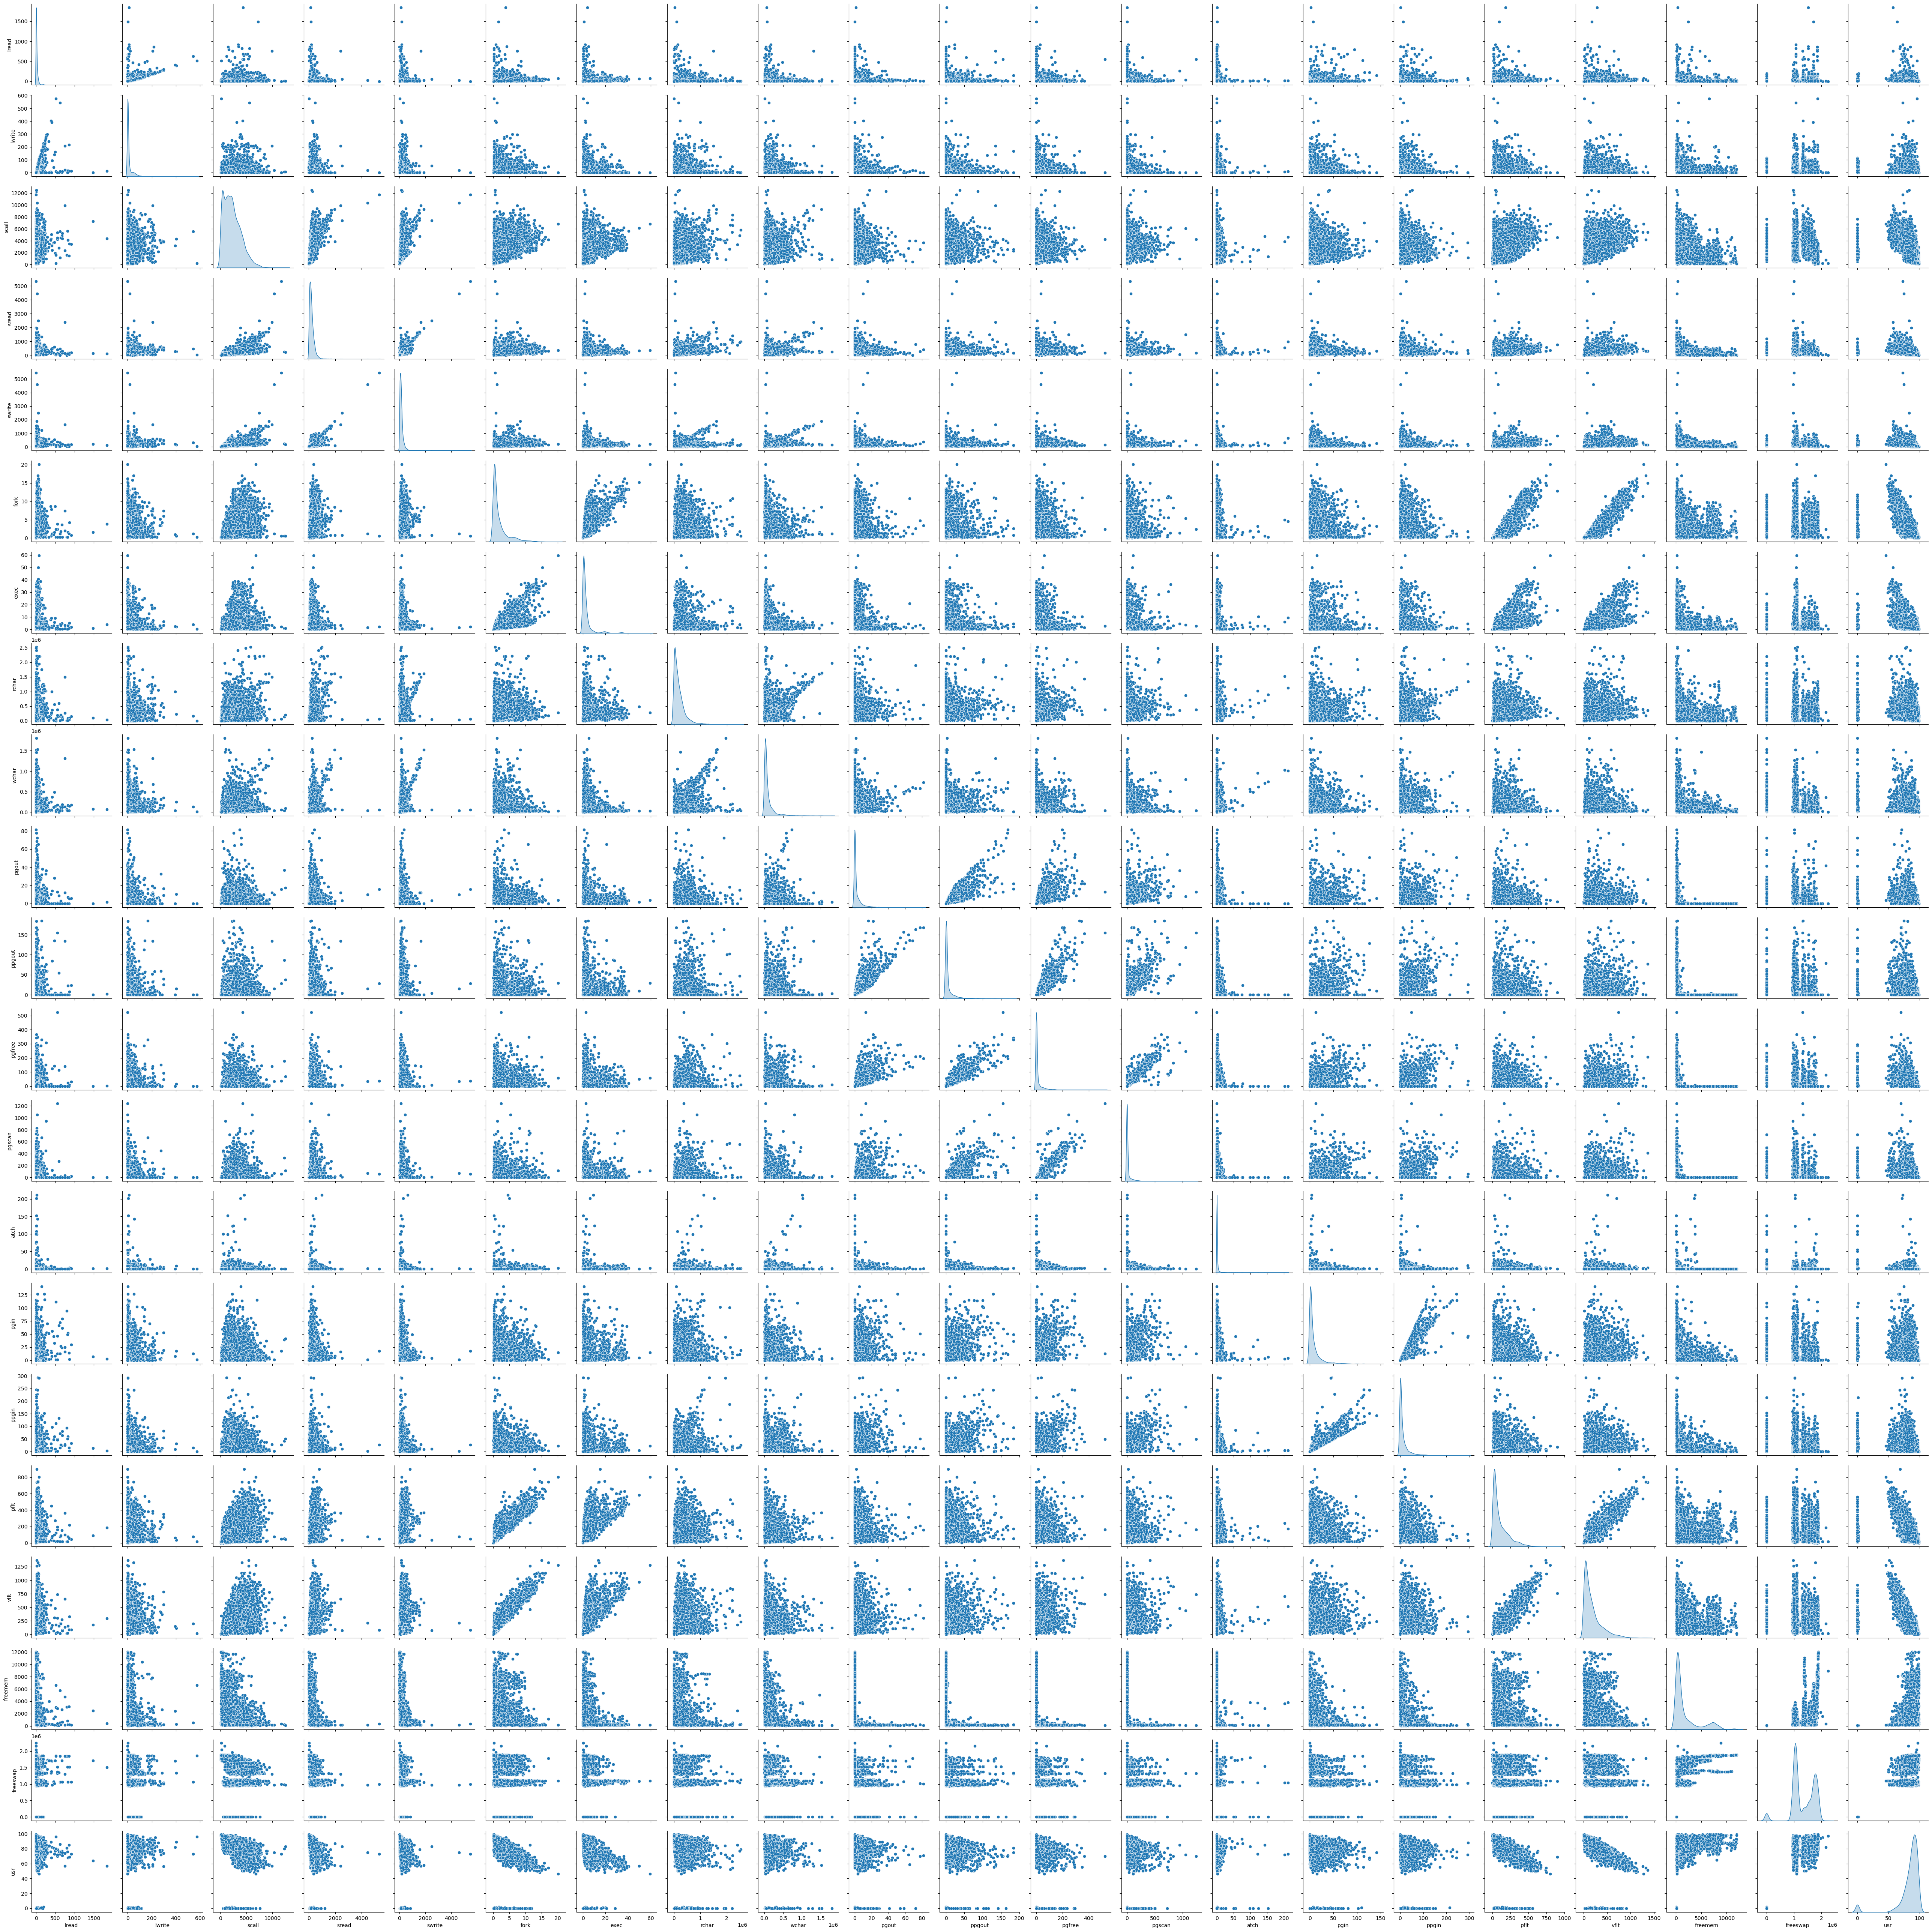

In [24]:
sns.pairplot(df_new, diag_kind='kde')  

<Axes: xlabel='runqsz', ylabel='usr'>

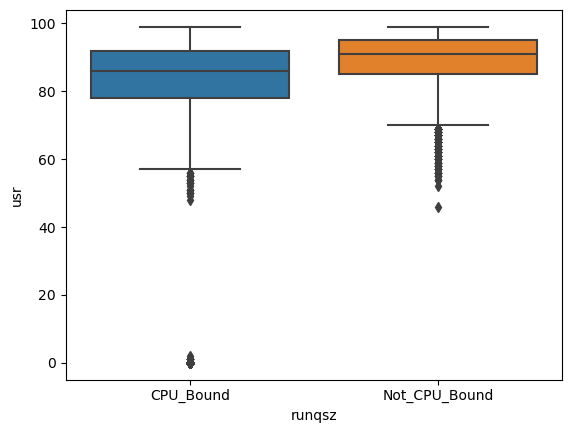

In [25]:
sns.boxplot(data= df_new, x='runqsz',y='usr')

<Axes: xlabel='lread', ylabel='lwrite'>

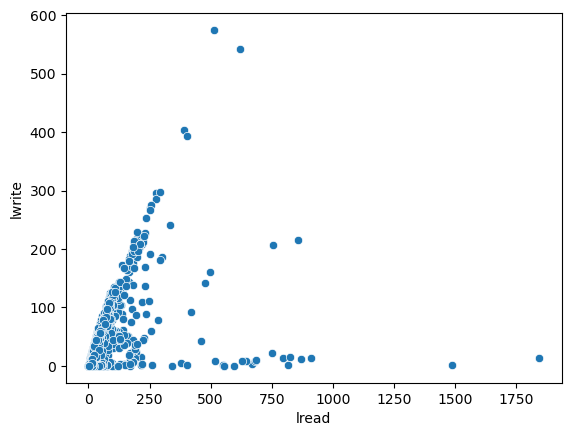

In [26]:
sns.scatterplot(data=df_new, x='lread',y='lwrite')

<Axes: xlabel='lwrite', ylabel='usr'>

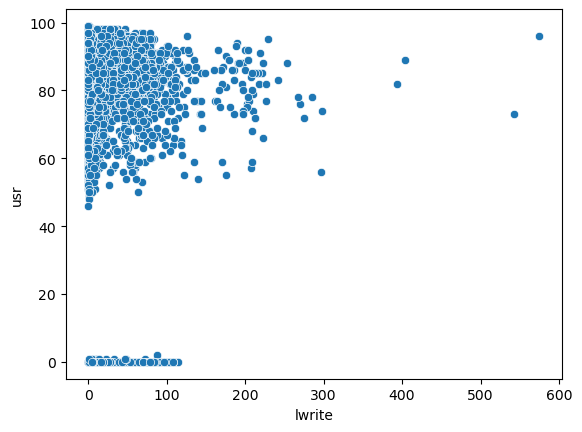

In [27]:
sns.scatterplot(data=df_new, x='lwrite',y='usr')

<Axes: xlabel='sread', ylabel='swrite'>

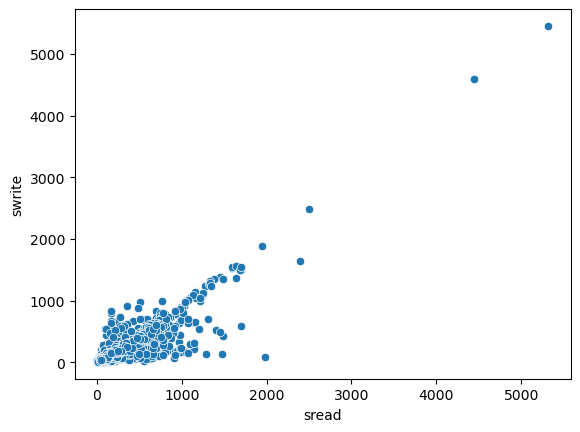

In [28]:
sns.scatterplot(data=df_new, x='sread',y='swrite')

<Axes: xlabel='swrite', ylabel='usr'>

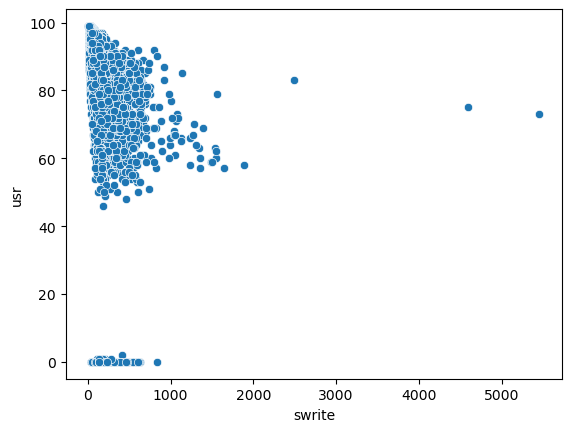

In [29]:
sns.scatterplot(data=df_new, x='swrite',y='usr')

<Axes: xlabel='fork', ylabel='exec'>

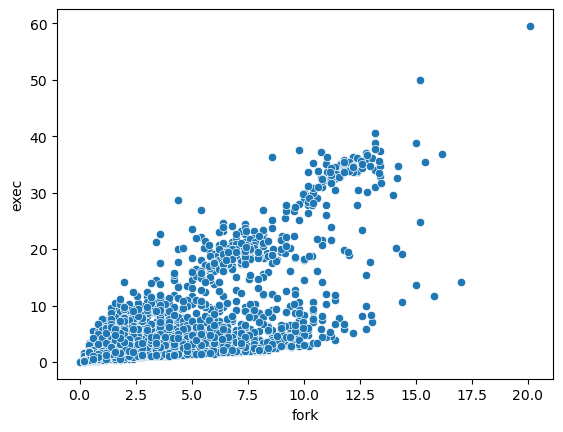

In [30]:
sns.scatterplot(data=df_new, x='fork',y='exec')

<Axes: xlabel='exec', ylabel='usr'>

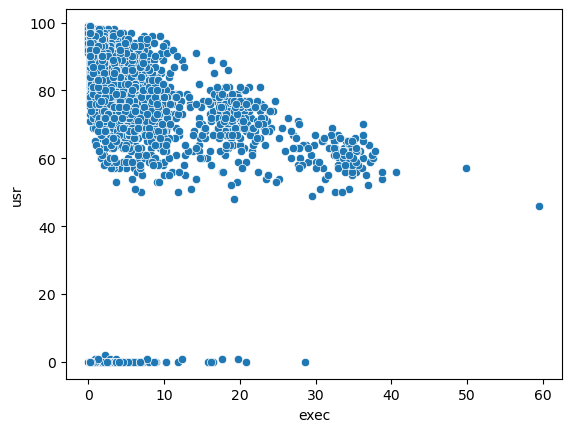

In [31]:
sns.scatterplot(data=df_new, x='exec',y='usr')

<Axes: xlabel='rchar', ylabel='usr'>

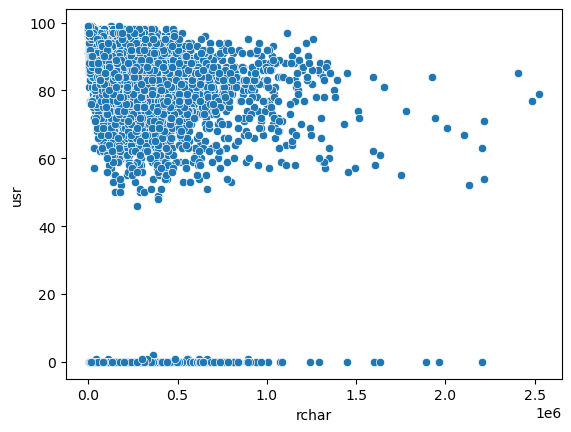

In [32]:
sns.scatterplot(data=df_new, x='rchar',y='usr')

<Axes: xlabel='wchar', ylabel='usr'>

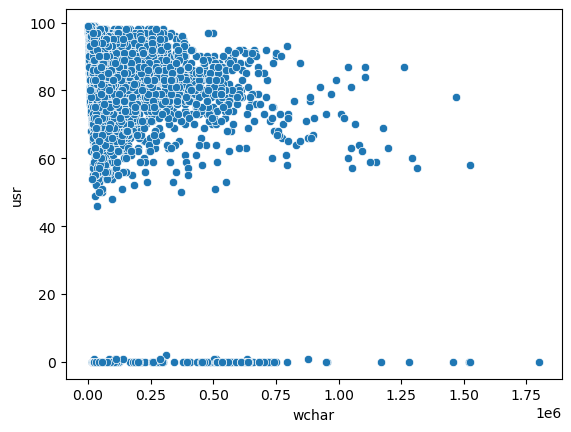

In [33]:
sns.scatterplot(data=df_new, x='wchar',y='usr')

<Axes: xlabel='pgout', ylabel='usr'>

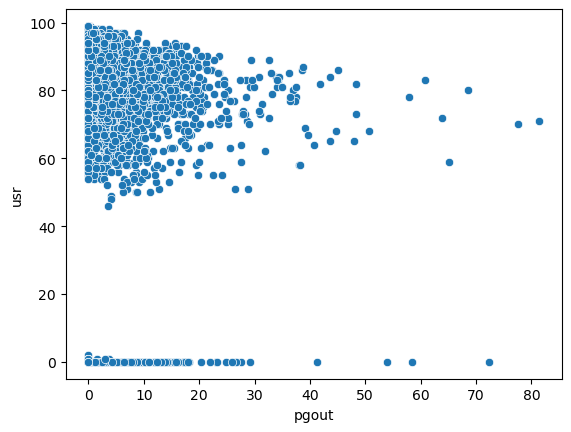

In [34]:
sns.scatterplot(data=df_new, x='pgout',y='usr')

<Axes: xlabel='ppgout', ylabel='usr'>

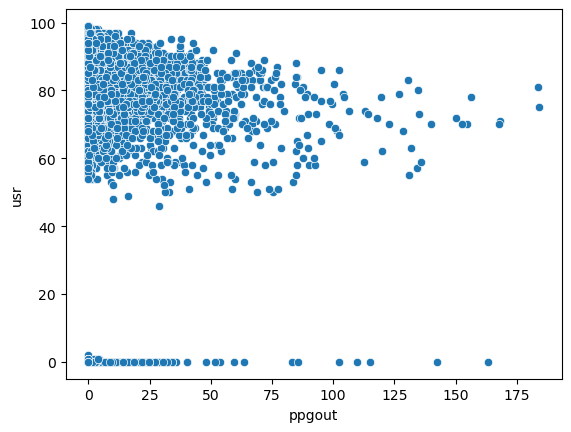

In [35]:
sns.scatterplot(data=df_new, x='ppgout',y='usr')

<Axes: xlabel='pgfree', ylabel='ppgout'>

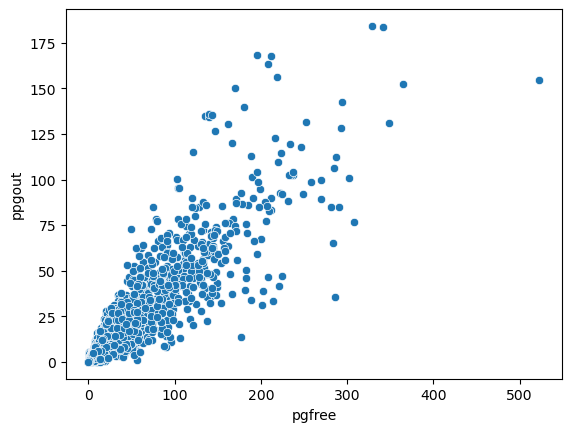

In [36]:
sns.scatterplot(data=df_new, x='pgfree',y='ppgout')

<Axes: xlabel='pgscan', ylabel='usr'>

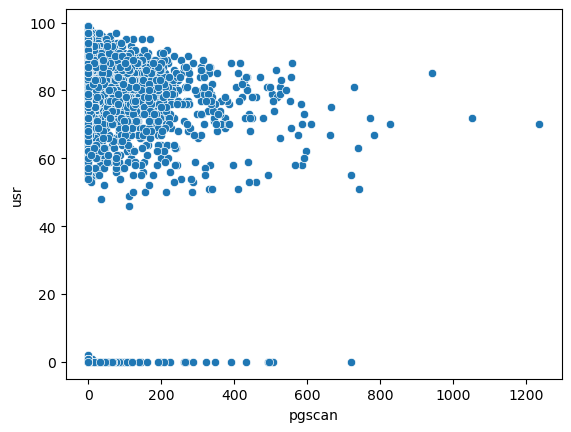

In [37]:
sns.scatterplot(data=df_new, x='pgscan',y='usr')

<Axes: xlabel='atch', ylabel='usr'>

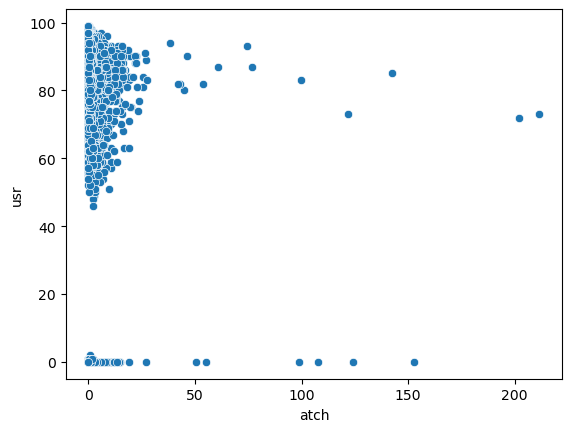

In [38]:
sns.scatterplot(data=df_new, x='atch',y='usr')

<Axes: xlabel='pgin', ylabel='usr'>

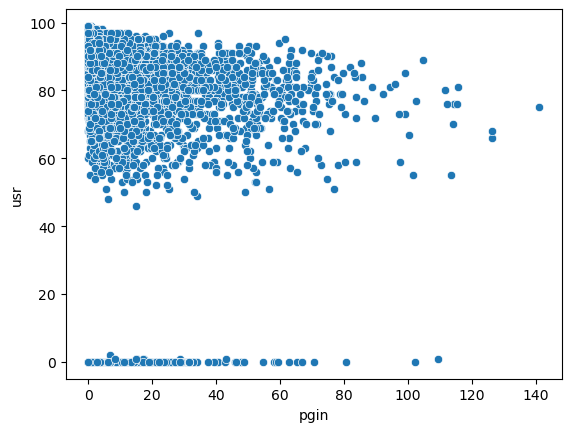

In [39]:
sns.scatterplot(data=df_new, x='pgin',y='usr')

<Axes: xlabel='ppgin', ylabel='usr'>

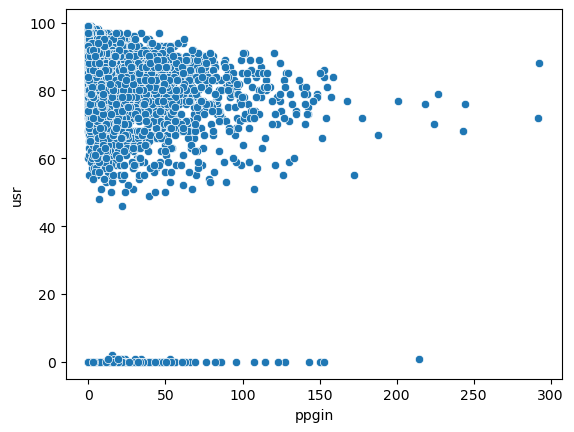

In [40]:
sns.scatterplot(data=df_new, x='ppgin',y='usr')

<Axes: xlabel='pflt', ylabel='usr'>

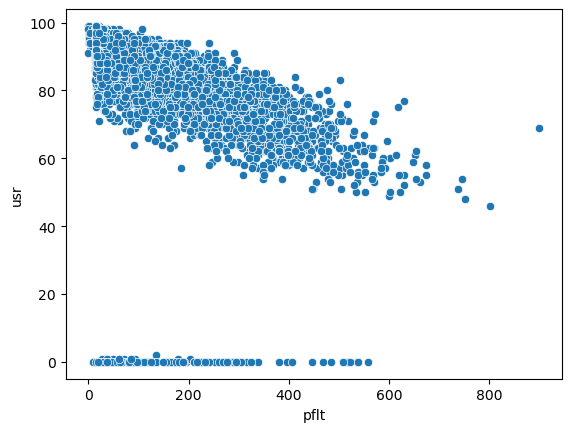

In [41]:
sns.scatterplot(data=df_new, x='pflt',y='usr')

<Axes: xlabel='vflt', ylabel='usr'>

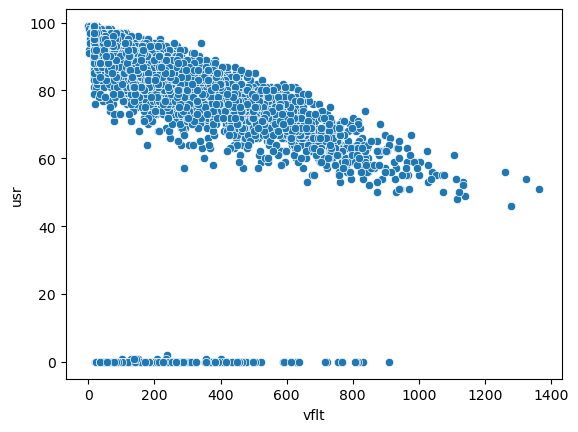

In [42]:
sns.scatterplot(data=df_new, x='vflt',y='usr')

<Axes: xlabel='freemem', ylabel='usr'>

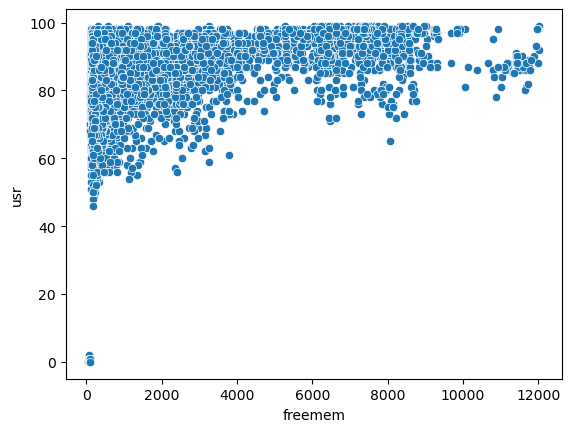

In [43]:
sns.scatterplot(data=df_new, x='freemem',y='usr')

<Axes: xlabel='freeswap', ylabel='usr'>

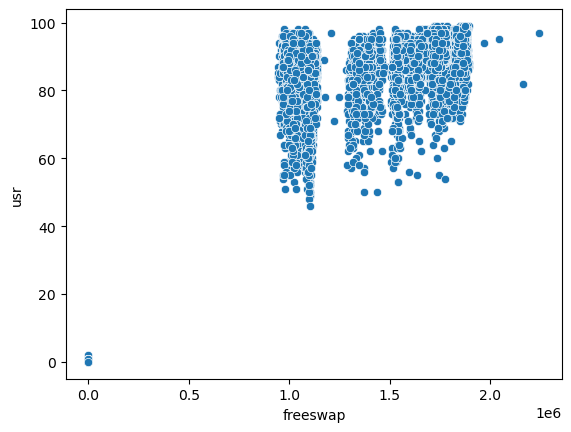

In [44]:
sns.scatterplot(data=df_new, x='freeswap',y='usr')

In [45]:
df_new = pd.get_dummies(df_new, columns=['runqsz'],drop_first=True)

In [46]:
df_new

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  \
0       1.0     0.0  2147.0   79.0    68.0   0.2  0.20   40671.0  53995.0   
1       0.0     0.0   170.0   18.0    21.0   0.2  0.20     448.0   8385.0   
2      15.0     3.0  2162.0  159.0   119.0   2.0  2.40  125473.5  31950.0   
3       0.0     0.0   160.0   12.0    16.0   0.2  0.20  125473.5   8670.0   
4       5.0     1.0   330.0   39.0    38.0   0.4  0.40  125473.5  12185.0   
...     ...     ...     ...    ...     ...   ...   ...       ...      ...   
8187   16.0    12.0  3009.0  360.0   244.0   1.6  5.81  405250.0  85282.0   
8188    4.0     0.0  1596.0  170.0   146.0   2.4  1.80   89489.0  41764.0   
8189   16.0     5.0  3116.0  289.0   190.0   0.6  0.60  325948.0  52640.0   
8190   32.0    45.0  5180.0  254.0   179.0   1.2  1.20   62571.0  29505.0   
8191    2.0     0.0   985.0   55.0    46.0   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt  freemem  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40   4670.0   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83   7278.0   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20    702.0   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80   7248.0   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60    633.0   
...     ...  ...     ...   ...    ...    ...     ...     ...      ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74    387.0   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60    263.0   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80    400.0   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81    141.0   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00    659.0   

       freeswap   usr  runqsz_Not_CPU_Bound  
0     1730946.0  95.0                     0  
1     1869002.0  97.0                     1  
2     1021237.0  87.0                     1  
3     1863704.0  98.0                     1  
4     1760253.0  90.0                     1  
...         ...   ...                   ...  
8187   986647.0  80.0                     0  
8188  1055742.0  90.0                     1  
8189   969106.0  87.0                     1  
8190  1022458.0  83.0                     0  
8191  1756514.0  94.0                     0  

[8192 rows x 22 columns]

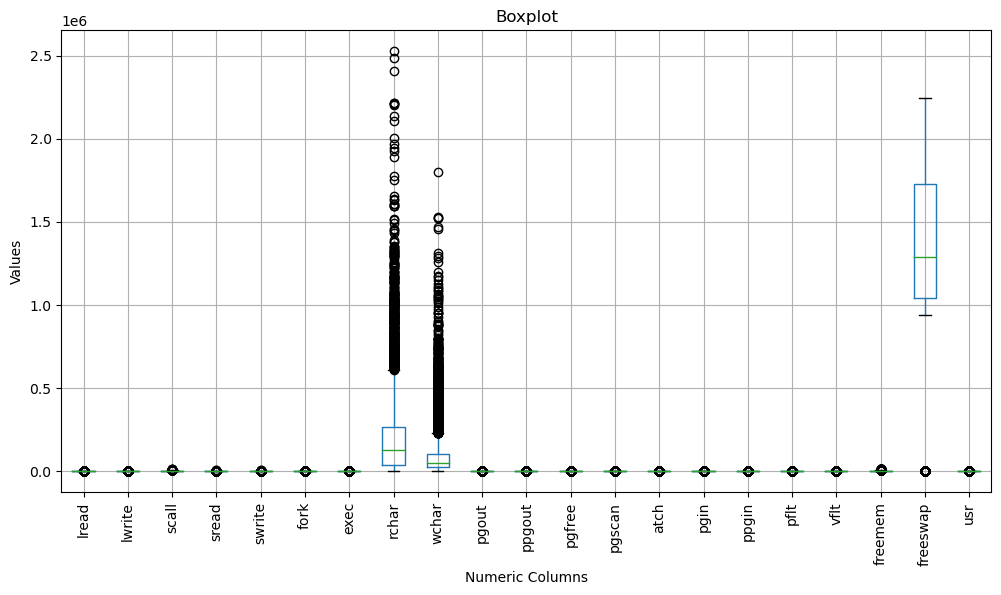

In [47]:
plt.figure(figsize=(12, 6))  
df_num.boxplot(rot=90)
plt.title('Boxplot')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')

plt.show()


In [48]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [49]:
for column in df_new.columns:
    lr,ur=remove_outlier(df_new[column])
    df_new[column]=np.where(df_new[column]>ur,ur,df_new[column])
    df_new[column]=np.where(df_new[column]<lr,lr,df_new[column])

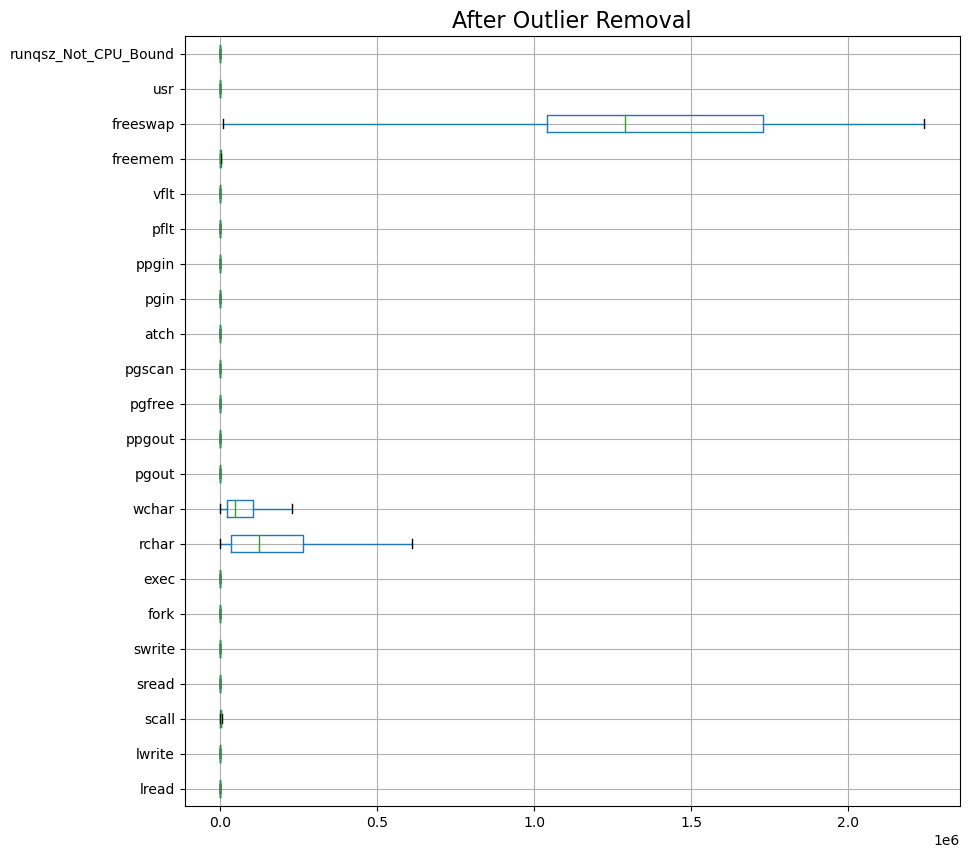

In [50]:
plt.figure(figsize=(10,10))
df_new.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

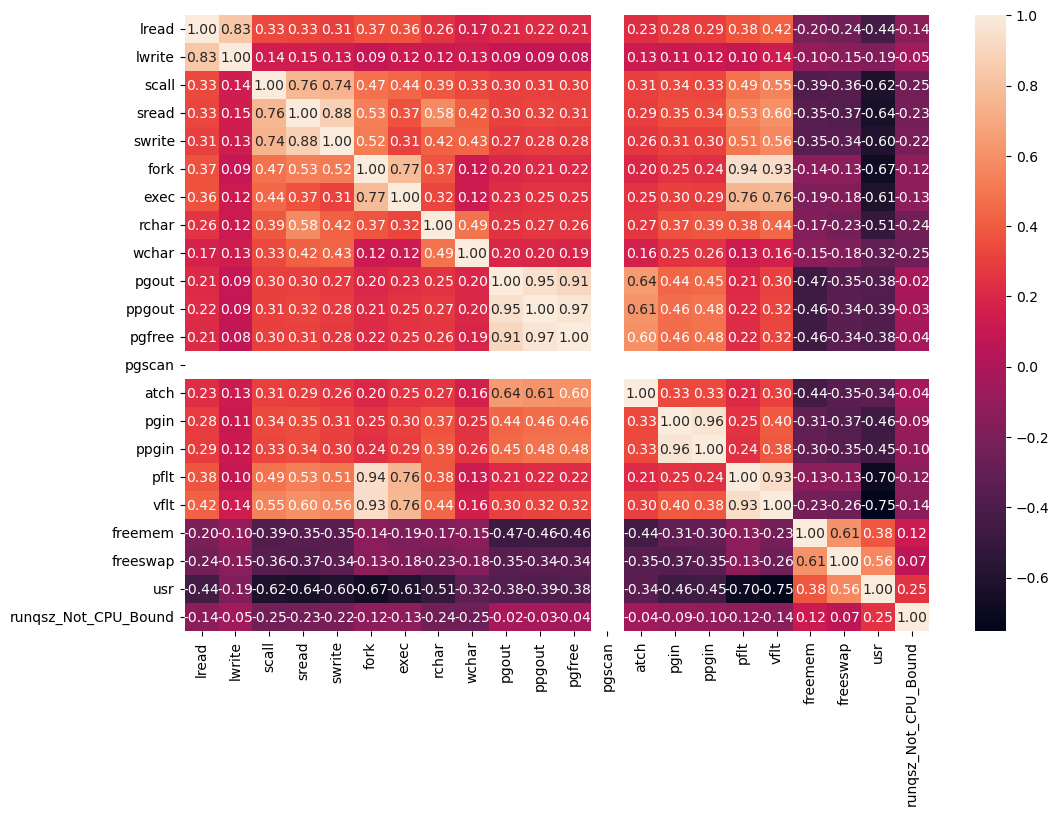

In [51]:
plt.figure(figsize = (12,8))
sns.heatmap(df_new.corr(), annot=True,fmt='.2f');

**The variable 'fork', 'pflt','vflt', 'execfreeswap','usr','pgfree','ppgout', swrite',sread' etc are having high correlation with each other.**
We can always perform Principal Component Analysis. But the interpretability of the Linear Regression model becomes tedious when we fit the new independent variables (after performing PCA) into the Linear Regression model.
So, currently we are not performing PCA.


Example:The metric "lread," which measures reads (transfers per second) between system memory and user memory, can indeed have a minimum value of 0. In fact, it's quite common for metrics like "lread" to have 0 as their minimum values in certain scenarios. So, we are proceeding with the further steps.

In [52]:
X = df_new.drop('usr', axis=1)
y = df_new[['usr']]

In [53]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [54]:
import statsmodels.api as sm

In [55]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [56]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:51   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217 

In [57]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.229332
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
pgscan                        NaN
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
runqsz_Not_CPU_Bound     1.156815
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


The Variance Inflation Factor is the measure of multicollinearity that exists in the set of variables that are involved in multiple regressions. Generally, the vif value above 10 indicates that there is a high correlation with the other independent variables



<font color='red'><i>We remove those predictors with multicolinarity due to which there is least impact on the adjusted R2 </i></font>

In [58]:
X_train1 = X_train.drop(["ppgout"], axis=1)


In [59]:
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:51   Log-Likelihood:                -16658.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1477 

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


VIF values: 

const                   29.021961
lread                    5.350387
lwrite                   4.328325
scall                    2.960379
sread                    6.420135
swrite                   5.597025
fork                    13.027305
exec                     3.239231
rchar                    2.133614
wchar                    1.580894
pgout                    6.453978
pgfree                   6.172847
pgscan                        NaN
atch                     1.875553
pgin                    13.784007
ppgin                   13.898848
pflt                    12.001460
vflt                    15.966865
freemem                  1.959267
freeswap                 1.838167
runqsz_Not_CPU_Bound     1.156421
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [61]:
X_train2 = X_train.drop(["pgfree"], axis=1)

In [62]:
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1173.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:52   Log-Likelihood:                -16659.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1583 

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   29.104453
lread                    5.350249
lwrite                   4.327383
scall                    2.958105
sread                    6.420154
swrite                   5.597127
fork                    13.034330
exec                     3.241322
rchar                    2.133610
wchar                    1.581770
pgout                   11.140354
ppgout                  11.002640
pgscan                        NaN
atch                     1.874864
pgin                    13.809241
ppgin                   13.950674
pflt                    11.994236
vflt                    15.961041
freemem                  1.951034
freeswap                 1.840999
runqsz_Not_CPU_Bound     1.156119
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [64]:
X_train3 = X_train.drop(["vflt"], axis=1)

In [65]:
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1170.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:52   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5714   BIC:                         3.350e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.9820 

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   28.840146
lread                    5.335683
lwrite                   4.327212
scall                    2.953221
sread                    6.374777
swrite                   5.595875
fork                    10.093543
exec                     3.237676
rchar                    2.123783
wchar                    1.562132
pgout                   11.351735
ppgout                  29.396520
pgfree                  16.486410
pgscan                        NaN
atch                     1.864541
pgin                    13.625310
ppgin                   13.951827
pflt                     9.132540
freemem                  1.960056
freeswap                 1.790376
runqsz_Not_CPU_Bound     1.156762
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [67]:
X_train4 = X_train.drop(["ppgin"], axis=1)

In [68]:
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1171.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:52   Log-Likelihood:                -16663.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5714   BIC:                         3.350e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1593 

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   29.194021
lread                    5.319503
lwrite                   4.317775
scall                    2.959430
sread                    6.420035
swrite                   5.597042
fork                    13.022076
exec                     3.241383
rchar                    2.100319
wchar                    1.584354
pgout                   11.316746
ppgout                  29.292509
pgfree                  16.495352
pgscan                        NaN
atch                     1.875248
pgin                     1.712859
pflt                    12.001181
vflt                    15.971018
freemem                  1.961133
freeswap                 1.839270
runqsz_Not_CPU_Bound     1.156488
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [70]:
X_train5 = X_train.drop(["pgin"], axis=1)

In [71]:
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:53   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1381 

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series5 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   29.070635
lread                    5.347799
lwrite                   4.328345
scall                    2.958898
sread                    6.418914
swrite                   5.596657
fork                    13.018958
exec                     3.238658
rchar                    2.122035
wchar                    1.583303
pgout                   11.324673
ppgout                  29.350284
pgfree                  16.496631
pgscan                        NaN
atch                     1.875869
ppgin                    1.730536
pflt                    11.952135
vflt                    15.758213
freemem                  1.961303
freeswap                 1.833947
runqsz_Not_CPU_Bound     1.156742
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [73]:
X_train6 = X_train.drop(["pflt"], axis=1)

In [74]:
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1104.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:53   Log-Likelihood:                -16798.
No. Observations:                5734   AIC:                         3.364e+04
Df Residuals:                    5714   BIC:                         3.377e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.4803 

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series6 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   29.098579
lread                    5.333343
lwrite                   4.315525
scall                    2.960536
sread                    6.419474
swrite                   5.597134
fork                    11.226855
exec                     3.217123
rchar                    2.133424
wchar                    1.584206
pgout                   11.355593
ppgout                  29.404223
pgfree                  16.486818
pgscan                        NaN
atch                     1.874470
pgin                    13.752584
ppgin                   13.951530
vflt                    12.153208
freemem                  1.960050
freeswap                 1.819648
runqsz_Not_CPU_Bound     1.156815
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [76]:
X_train7 = X_train.drop(["fork"], axis=1)

In [77]:
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:53   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1132 

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series7 = pd.Series(
    [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])],
    index=X_train7.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                   28.797906
lread                    5.345759
lwrite                   4.317084
scall                    2.916206
sread                    6.403125
swrite                   5.424224
exec                     2.978791
rchar                    2.133456
wchar                    1.584317
pgout                   11.355343
ppgout                  29.386056
pgfree                  16.495446
pgscan                        NaN
atch                     1.869599
pgin                    13.791964
ppgin                   13.937639
pflt                    10.336398
vflt                    12.366708
freemem                  1.961289
freeswap                 1.817472
runqsz_Not_CPU_Bound     1.156491
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [79]:
X_train8 = X_train1.drop(["vflt"], axis=1)

In [80]:
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1235.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:54   Log-Likelihood:                -16665.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0090 

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series8 = pd.Series(
    [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])],
    index=X_train8.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                   28.641818
lread                    5.335455
lwrite                   4.327130
scall                    2.952947
sread                    6.374687
swrite                   5.595777
fork                    10.089700
exec                     3.235396
rchar                    2.123783
wchar                    1.558923
pgout                    6.450724
pgfree                   6.149223
pgscan                        NaN
atch                     1.864254
pgin                    13.602134
ppgin                   13.898845
pflt                     9.131802
freemem                  1.957966
freeswap                 1.787695
runqsz_Not_CPU_Bound     1.156363
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [82]:
X_train9 = X_train1.drop(["pflt"], axis=1)

In [83]:
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1165.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:54   Log-Likelihood:                -16798.
No. Observations:                5734   AIC:                         3.363e+04
Df Residuals:                    5715   BIC:                         3.376e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.5062 

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series9 = pd.Series(
    [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])],
    index=X_train9.columns,
)
print("VIF values: \n\n{}\n".format(vif_series9))

VIF values: 

const                   28.891232
lread                    5.333170
lwrite                   4.315453
scall                    2.960306
sread                    6.419437
swrite                   5.597024
fork                    11.218784
exec                     3.214937
rchar                    2.133423
wchar                    1.580719
pgout                    6.449230
pgfree                   6.162871
pgscan                        NaN
atch                     1.874122
pgin                    13.727257
ppgin                   13.898524
vflt                    12.149042
freemem                  1.958013
freeswap                 1.816577
runqsz_Not_CPU_Bound     1.156421
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [85]:
X_train10 = X_train1.drop(["ppgin"], axis=1)

In [86]:
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1236.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:54   Log-Likelihood:                -16664.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1917 

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series10 = pd.Series(
    [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])],
    index=X_train10.columns,
)
print("VIF values: \n\n{}\n".format(vif_series10))

VIF values: 

const                   28.975135
lread                    5.318924
lwrite                   4.317554
scall                    2.959260
sread                    6.420006
swrite                   5.596919
fork                    13.012661
exec                     3.239222
rchar                    2.100217
wchar                    1.580891
pgout                    6.448728
pgfree                   6.117217
pgscan                        NaN
atch                     1.874837
pgin                     1.709798
pflt                    12.001180
vflt                    15.966863
freemem                  1.959014
freeswap                 1.835875
runqsz_Not_CPU_Bound     1.156047
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [88]:
X_train11 = X_train1.drop(["pgin"], axis=1)

In [89]:
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1239.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:55   Log-Likelihood:                -16658.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5715   BIC:                         3.348e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1659 

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series11 = pd.Series(
    [variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])],
    index=X_train11.columns,
)
print("VIF values: \n\n{}\n".format(vif_series11))

VIF values: 

const                   28.847023
lread                    5.347561
lwrite                   4.328267
scall                    2.958719
sread                    6.418856
swrite                   5.596566
fork                    13.011845
exec                     3.236673
rchar                    2.122024
wchar                    1.579974
pgout                    6.445116
pgfree                   6.156738
pgscan                        NaN
atch                     1.875512
ppgin                    1.724043
pflt                    11.952049
vflt                    15.756191
freemem                  1.959266
freeswap                 1.830450
runqsz_Not_CPU_Bound     1.156333
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [91]:
X_train12 = X_train1.drop(["fork"], axis=1)

In [92]:
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1239.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:55   Log-Likelihood:                -16658.
No. Observations:                5734   AIC:                         3.335e+04
Df Residuals:                    5715   BIC:                         3.348e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1383 

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series12 = pd.Series(
    [variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])],
    index=X_train12.columns,
)
print("VIF values: \n\n{}\n".format(vif_series12))

VIF values: 

const                   28.605018
lread                    5.345629
lwrite                   4.317050
scall                    2.915790
sread                    6.403038
swrite                   5.424224
exec                     2.977633
rchar                    2.133455
wchar                    1.580804
pgout                    6.453728
pgfree                   6.170928
pgscan                        NaN
atch                     1.869320
pgin                    13.767649
ppgin                   13.883225
pflt                    10.335353
vflt                    12.366402
freemem                  1.959259
freeswap                 1.814809
runqsz_Not_CPU_Bound     1.156115
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [94]:
X_train13 = X_train8.drop(["ppgin"], axis=1)

In [95]:
olsmod_13 = sm.OLS(y_train, X_train13)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1305.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:55   Log-Likelihood:                -16671.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5716   BIC:                         3.350e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0531 

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series13 = pd.Series(
    [variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])],
    index=X_train13.columns,
)
print("VIF values: \n\n{}\n".format(vif_series13))

VIF values: 

const                   28.594882
lread                    5.304009
lwrite                   4.316362
scall                    2.951826
sread                    6.374556
swrite                   5.595670
fork                    10.074886
exec                     3.235387
rchar                    2.090401
wchar                    1.558921
pgout                    6.445478
pgfree                   6.093623
pgscan                        NaN
atch                     1.863536
pgin                     1.529142
pflt                     9.131545
freemem                  1.957713
freeswap                 1.785393
runqsz_Not_CPU_Bound     1.155990
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [97]:
X_train14 = X_train8.drop(["pgin"], axis=1)

In [98]:
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1308.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:56   Log-Likelihood:                -16665.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5716   BIC:                         3.349e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0178 

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series14 = pd.Series(
    [variance_inflation_factor(X_train14.values, i) for i in range(X_train14.shape[1])],
    index=X_train14.columns,
)
print("VIF values: \n\n{}\n".format(vif_series14))

VIF values: 

const                   28.399422
lread                    5.333903
lwrite                   4.327117
scall                    2.950348
sread                    6.374558
swrite                   5.595470
fork                    10.084368
exec                     3.232024
rchar                    2.114391
wchar                    1.558744
pgout                    6.442951
pgfree                   6.137124
pgscan                        NaN
atch                     1.863900
ppgin                    1.562498
pflt                     9.131024
freemem                  1.957955
freeswap                 1.774606
runqsz_Not_CPU_Bound     1.156290
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [100]:
X_train15 = X_train8.drop(["fork"], axis=1)

In [101]:
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print(olsres_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1307.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:56   Log-Likelihood:                -16667.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5716   BIC:                         3.349e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0511 

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series15 = pd.Series(
    [variance_inflation_factor(X_train15.values, i) for i in range(X_train15.shape[1])],
    index=X_train15.columns,
)
print("VIF values: \n\n{}\n".format(vif_series15))

VIF values: 

const                   28.480993
lread                    5.314627
lwrite                   4.307722
scall                    2.915535
sread                    6.373562
swrite                   5.390313
exec                     2.857679
rchar                    2.122249
wchar                    1.550690
pgout                    6.450559
pgfree                   6.148124
pgscan                        NaN
atch                     1.863207
pgin                    13.594946
ppgin                   13.878438
pflt                     3.463830
freemem                  1.957452
freeswap                 1.784945
runqsz_Not_CPU_Bound     1.155788
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [103]:
X_train16 = X_train14.drop(["fork"], axis=1)

In [104]:
olsmod_16 = sm.OLS(y_train, X_train16)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1389.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:52:57   Log-Likelihood:                -16667.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5717   BIC:                         3.348e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0586 

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series16 = pd.Series(
    [variance_inflation_factor(X_train16.values, i) for i in range(X_train16.shape[1])],
    index=X_train16.columns,
)
print("VIF values: \n\n{}\n".format(vif_series16))

VIF values: 

const                   28.247467
lread                    5.313325
lwrite                   4.307722
scall                    2.913367
sread                    6.373415
swrite                   5.389533
exec                     2.852464
rchar                    2.113026
wchar                    1.550562
pgout                    6.442834
pgfree                   6.136186
pgscan                        NaN
atch                     1.862881
ppgin                    1.558638
pflt                     3.463109
freemem                  1.957438
freeswap                 1.772123
runqsz_Not_CPU_Bound     1.155723
dtype: float64



/Users/pavithra/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply . This shows that these variables did not have much predictive power.

In [106]:
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train16.columns)):
    if i == 0:
        print(olsres_16.params[i], "+", end=" ")
    elif i != len(X_train16.columns) - 1:
        print(
            olsres_16.params[i],
            "* (",
            X_train16.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_16.params[i], "* (", X_train16.columns[i], ")")

usr = 84.05856335897678 + -0.06639749302635382 * ( lread ) +  0.05062949916526123 * ( lwrite ) +  -0.0006633462059526882 * ( scall ) +  2.0263043186531464e-06 * ( sread ) +  -0.005834674066289943 * ( swrite ) +  -0.36039218359254926 * ( exec ) +  -5.325655903933241e-06 * ( rchar ) +  -4.846280495168696e-06 * ( wchar ) +  -0.41928472573063674 * ( pgout ) +  0.03973838948169094 * ( pgfree ) +  -1.3758765788197688e-15 * ( pgscan ) +  0.5933871975543351 * ( atch ) +  -0.0622357957580468 * ( ppgin ) +  -0.03976942744236103 * ( pflt ) +  -0.0004665212214365948 * ( freemem ) +  8.927920908386326e-06 * ( freeswap ) +  1.6043116109101716 * ( runqsz_Not_CPU_Bound )


Each coefficient in the equation signifies the weight or influence of the corresponding independent variable on the predicted 'usr' value.
Each coefficient quantifies the change in the predicted 'usr' value associated with a one-unit change in the corresponding independent variable, assuming all other variables remain constant. For instance, if 'lread' increases by one unit while keeping all other variables constant, the 'usr' value is expected to decrease by approximately -0.06639.


In [107]:
X_train16.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgfree', 'pgscan', 'atch', 'ppgin', 'pflt',
       'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [108]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [109]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    [ 'fork','ppgout','pgin','vflt'], axis=1)

In [110]:
# let's make predictions on the test set
y_pred_test = olsres_16.predict(X_test2)
y_pred_train = olsres_16.predict(X_train16)

In [111]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [112]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1


4.426890322681982

In [113]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

4.66581091605454

### Linear Regression using (sklearn)

In [114]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train16, y_train)

LinearRegression()

In [115]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train16.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for lread is -0.06639749302628149
The coefficient for lwrite is 0.05062949916519846
The coefficient for scall is -0.0006633462059539676
The coefficient for sread is 2.026304334694975e-06
The coefficient for swrite is -0.0058346740662969096
The coefficient for exec is -0.36039218359231795
The coefficient for rchar is -5.325655904027929e-06
The coefficient for wchar is -4.846280495177564e-06
The coefficient for pgout is -0.4192847257304126
The coefficient for pgfree is 0.0397383894817412
The coefficient for pgscan is 1.6653345369377348e-16
The coefficient for atch is 0.5933871975567543
The coefficient for ppgin is -0.06223579575800658
The coefficient for pflt is -0.0397694274423693
The coefficient for freemem is -0.00046652122143602855
The coefficient for freeswap is 8.927920908410336e-06
The coefficient for runqsz_Not_CPU_Bound is 1.6043116109101607


In [116]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 84.05856335896442


In [117]:
# R square on training data
regression_model.score(X_train16, y_train)

0.795429483785413

79% of the variation in the usr is explained by the predictors in the model for train set

In [118]:
# R square on testing data
regression_model.score(X_test2, y_test)

0.7663803924569392

In [119]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train16, y_train).predict(X_train16)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.426890322681982

In [120]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train16, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.665810916054599